#### Nama : Rahmatul Idami

#### NPM : 2108107010071

### Dataset
Dataset yang saya pakai adalah dataset tentang Data transaksi apartemen yang dihasilkan dari Agustus 2007 - Agustus 2017 di Daebong, kota Daegu, Korea Selatan. Dataset ini terdiri dari 30 fitur dan 5891 data.

Dataset tersebut diambil dari kaggle, berikut link dataset nya: https://www.kaggle.com/datasets/gunhee/koreahousedata

Tidak semua fitur saya gunakan, saya hanya memakai 2 fitur saja yaitu fitur SalePrice (harga penjualan dalam dollar) dan size (ukuran apartemen).


Saya ingin memprediksi harga penjualan apartemen berdasarkan ukurannya. Saya memiliki dataset yang berisi informasi tentang ukuran apartemen (dalam meter persegi) dan harga penjualannya (dalam dolar). Dengan menggunakan model Support Vector Regression (SVR), Saya dapat membangun sebuah sistem prediksi yang dapat memberikan perkiraan harga penjualan yang akurat berdasarkan ukuran apartemen. 

### Proses melatih dan menguji model SVR

In [1]:
#Impor perpustakaan yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#Menampilkan dataset
dataset = pd.read_csv('Dataset/Daegu_data.csv')
dataset

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [3]:
# Menentukan fitur yang tidak diperlukan
fitur_tidak_diperlukan = ['YearBuilt', 'YrSold', 'MonthSold',
       'HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway',
       'N_manager', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)']

# Menghapus fitur yang tidak diperlukan dari DataFrame
df = dataset.drop(fitur_tidak_diperlukan, axis=1)

# Mengecek DataFrame setelah menghapus fitur
print(df)

      SalePrice  Size(sqf)  Floor  N_Parkinglot(Ground)  \
0        141592        814      3                 111.0   
1         51327        587      8                  80.0   
2         48672        587      6                  80.0   
3        380530       2056      8                 249.0   
4        221238       1761      3                 523.0   
...         ...        ...    ...                   ...   
5886     511504       1643     19                   0.0   
5887     298230        903     13                 123.0   
5888     357522        868     20                   0.0   
5889     312389       1327      1                  87.0   
5890     393805        868     13                   0.0   

      N_Parkinglot(Basement)  N_APT  N_elevators  N_SchoolNearBy(Total)  
0                      184.0    3.0          0.0                    9.0  
1                       76.0    1.0          2.0                    4.0  
2                       76.0    1.0          2.0                    4

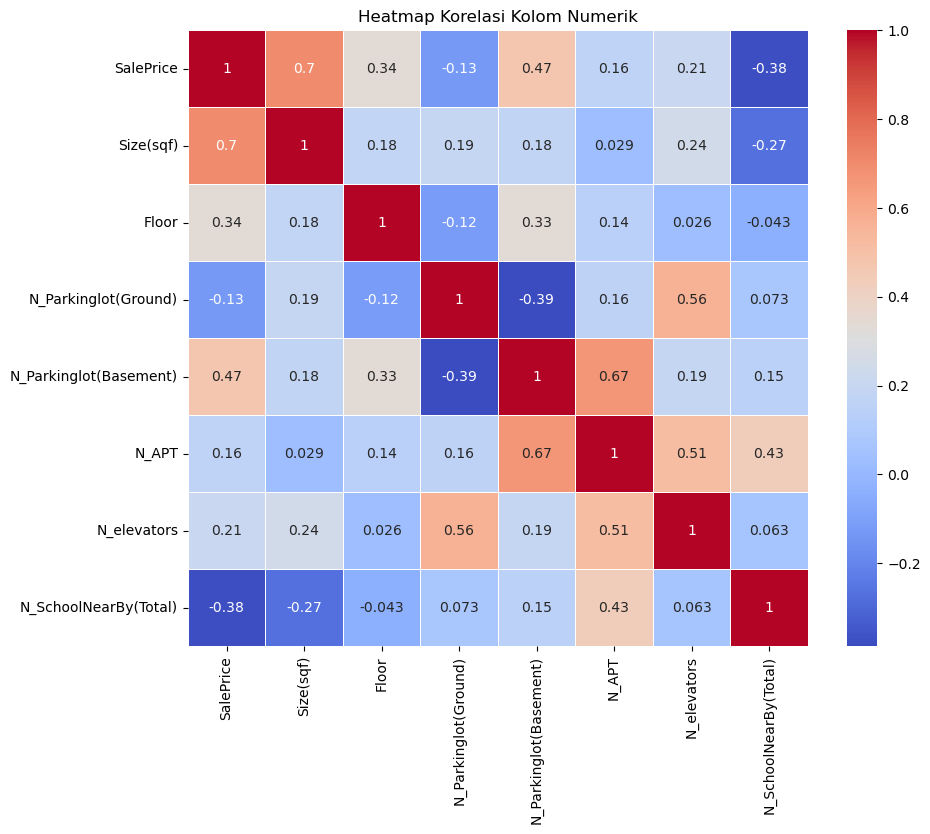

In [4]:
kolom_numerik = df.select_dtypes(include=['float64', 'int64'])

# Mengecek korelasi antar kolom numerik
cor_numerik = kolom_numerik.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_numerik, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi Kolom Numerik')
plt.show()

Dapat dilihat dari heapmap diatas bahwa saleprice memiliki korelasi sangat lumayan tinggi dengan size yaitu 0,7.

In [5]:
# Menghapus baris yang mengandung NaN
df = df.dropna()

# Menghitung jumlah nilai NaN di setiap kolom DataFrame
jumlah_nan_per_kolom = df.isna().sum()

# Menampilkan jumlah nilai NaN di setiap kolom
print(jumlah_nan_per_kolom)


SalePrice                 0
Size(sqf)                 0
Floor                     0
N_Parkinglot(Ground)      0
N_Parkinglot(Basement)    0
N_APT                     0
N_elevators               0
N_SchoolNearBy(Total)     0
dtype: int64


In [6]:
# Memisahkan fitur dan target
X = df['Size(sqf)'].values.reshape(-1, 1)
y = df['SalePrice'].values

# Pembagian data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Penskalaan fitur
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Membuat model SVR dengan kernel RBF dan melatihnya pada data pelatihan
regressor = SVR()
regressor.fit(X_train_scaled, y_train)

# Prediksi harga penjualan untuk ukuran yang diberikan mis: 1500
size_to_predict = 1500
size_scaled = scaler_X.transform([[size_to_predict]])
predicted_price = regressor.predict(size_scaled)
print("Prediksi harga penjualan untuk ukuran", size_to_predict, "adalah", predicted_price[0])


Prediksi harga penjualan untuk ukuran 1500 adalah 208684.55161694204


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Melakukan prediksi terhadap data pelatihan
y_train_pred = regressor.predict(X_train_scaled)

# Melakukan prediksi terhadap data uji
y_test_pred = regressor.predict(X_test_scaled)

print("Pelatihan:")
# Menghitung Mean Squared Error (MSE) untuk data pelatihan
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) - Pelatihan:", mse_train)

# Menghitung Mean Absolute Error (MAE) untuk data pelatihan
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (MAE) - Pelatihan:", mae_train)

# Menghitung koefisien determinasi (R-squared) untuk data pelatihan
r2_train = r2_score(y_train, y_train_pred)
print("R-squared - Pelatihan:", r2_train)

# Menghitung RMSE untuk data latih
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE untuk data latih:", rmse_train)

print("\n")

print("Pengujian:")
# Menghitung Mean Squared Error (MSE) untuk data pengujian
mse_test = mean_squared_error(y_test, y_test_pred)
print("\nMean Squared Error (MSE) - Pengujian:", mse_test)

# Menghitung Mean Absolute Error (MAE) untuk data pengujian
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (MAE) - Pengujian:", mae_test)

# Menghitung koefisien determinasi (R-squared) untuk data pengujian
r2_test = r2_score(y_test, y_test_pred)
print("R-squared - Pengujian:", r2_test)

# Menghitung RMSE untuk data uji
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE untuk data uji:", rmse_test)


Pelatihan:
Mean Squared Error (MSE) - Pelatihan: 11547104369.10007
Mean Absolute Error (MAE) - Pelatihan: 86815.5140153647
R-squared - Pelatihan: -0.008091241670065807
RMSE untuk data latih: 107457.45376240808


Pengujian:

Mean Squared Error (MSE) - Pengujian: 11023728849.599525
Mean Absolute Error (MAE) - Pengujian: 84687.4870126237
R-squared - Pengujian: -0.011460876904983541
RMSE untuk data uji: 104993.94672836871


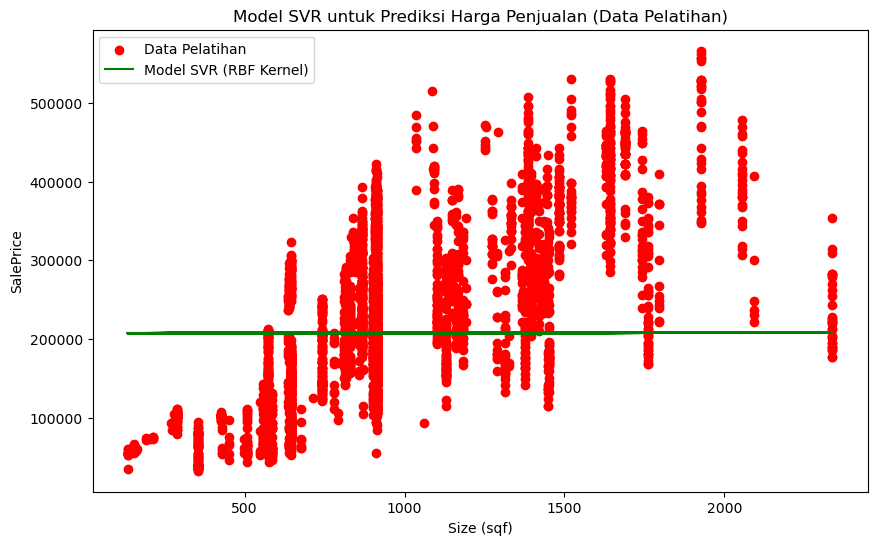

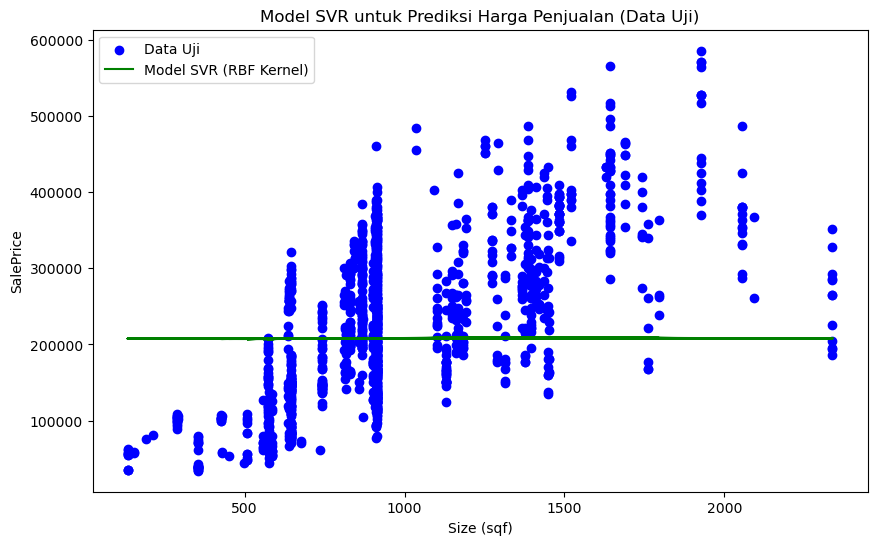

In [8]:
# Visualisasi hasil pelatihan
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Data Pelatihan')
plt.plot(X_train, regressor.predict(X_train_scaled), color='green', label='Model SVR (RBF Kernel)')
plt.title('Model SVR untuk Prediksi Harga Penjualan (Data Pelatihan)')
plt.xlabel('Size (sqf)')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

# Visualisasi hasil pengujian
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Data Uji')
plt.plot(X_test, regressor.predict(X_test_scaled), color='green', label='Model SVR (RBF Kernel)')
plt.title('Model SVR untuk Prediksi Harga Penjualan (Data Uji)')
plt.xlabel('Size (sqf)')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [9]:
# Memisahkan fitur dan target
X = df['Size(sqf)'].values.reshape(-1, 1)
y = df['SalePrice'].values

# Pembagian data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Membuat model SVR dengan kernel polinomial dan melatihnya pada data pelatihan
regressor_poly = SVR(kernel='poly', degree=3, C=100, epsilon=0.1, gamma='scale')
regressor_poly.fit(X_train_scaled, y_train)

# Prediksi harga penjualan untuk ukuran yang diberikan
size_to_predict = 1500
size_scaled = scaler_X.transform([[size_to_predict]])
predicted_price_poly = regressor_poly.predict(size_scaled)
print("Prediksi harga penjualan untuk ukuran", size_to_predict, "dengan model SVR (kernel polinomial) adalah", predicted_price_poly[0])


Prediksi harga penjualan untuk ukuran 1500 dengan model SVR (kernel polinomial) adalah 248647.585765312


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Melakukan prediksi terhadap data pelatihan
y_train_pred_poly = regressor_poly.predict(X_train_scaled)

# Melakukan prediksi terhadap data uji
y_test_pred_poly = regressor_poly.predict(X_test_scaled)

print("Pelatihan:")
# Menghitung Mean Squared Error (MSE) untuk data pelatihan
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
print("Mean Squared Error (MSE) - Pelatihan:", mse_train_poly)

# Menghitung Mean Absolute Error (MAE) untuk data pelatihan
mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
print("Mean Absolute Error (MAE) - Pelatihan:", mae_train_poly)

# Menghitung koefisien determinasi (R-squared) untuk data pelatihan
r2_train_poly = r2_score(y_train, y_train_pred_poly)
print("R-squared - Pelatihan:", r2_train_poly)

# Menghitung Root Mean Squared Error (RMSE) untuk data pelatihan
rmse_train_poly = np.sqrt(mse_train_poly)
print("RMSE - Pelatihan:", rmse_train_poly)

print("\n")
print("\nPengujian:")
# Menghitung Mean Squared Error (MSE) untuk data pengujian
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
print("Mean Squared Error (MSE) - Pengujian:", mse_test_poly)

# Menghitung Mean Absolute Error (MAE) untuk data pengujian
mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)
print("Mean Absolute Error (MAE) - Pengujian:", mae_test_poly)

# Menghitung koefisien determinasi (R-squared) untuk data pengujian
r2_test_poly = r2_score(y_test, y_test_pred_poly)
print("R-squared - Pengujian:", r2_test_poly)

# Menghitung Root Mean Squared Error (RMSE) untuk data pengujian
rmse_test_poly = np.sqrt(mse_test_poly)
print("RMSE - Pengujian:", rmse_test_poly)


Pelatihan:
Mean Squared Error (MSE) - Pelatihan: 12031278119.660086
Mean Absolute Error (MAE) - Pelatihan: 78112.79774136306
R-squared - Pelatihan: -0.04600082527143501
RMSE - Pelatihan: 109687.18302363355



Pengujian:
Mean Squared Error (MSE) - Pengujian: 11532926724.616484
Mean Absolute Error (MAE) - Pengujian: 75517.12596667712
R-squared - Pengujian: -0.09108727889138457
RMSE - Pengujian: 107391.46485925445


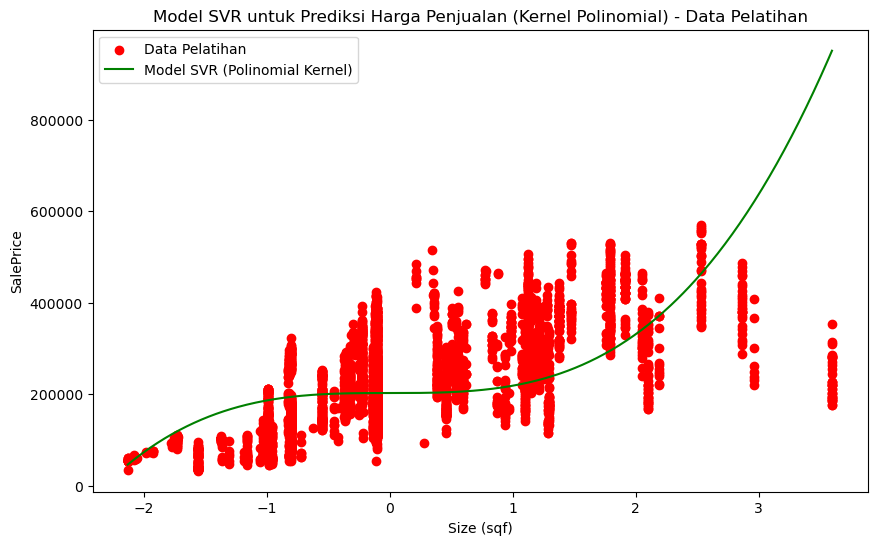

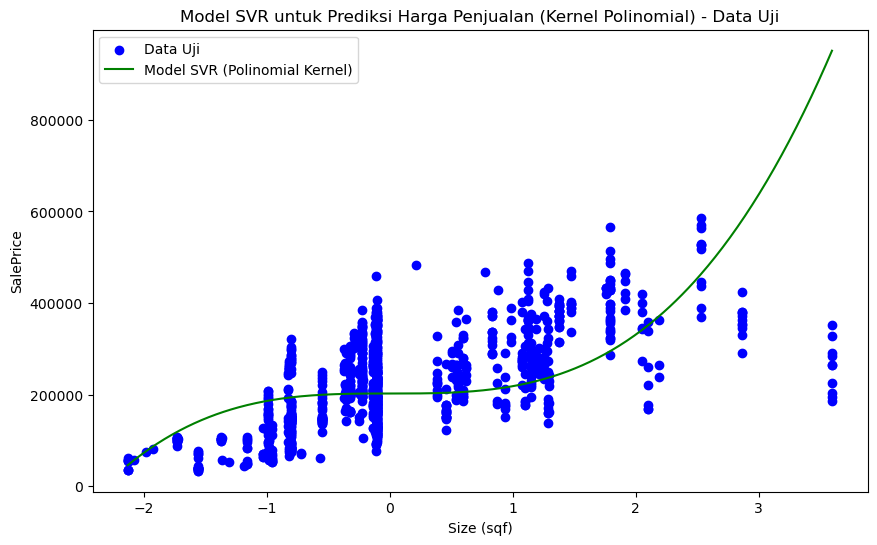

In [11]:
# Penskalaan fitur untuk data uji
X_test_scaled = scaler_X.transform(X_test)

# Membuat grid untuk visualisasi dengan resolusi tinggi
X_grid = np.arange(min(X_train_scaled), max(X_train_scaled), 0.01).reshape(-1, 1)

# Prediksi harga penjualan pada grid menggunakan model SVR (kernel polinomial)
predicted_prices_poly = regressor_poly.predict(X_grid)

# Visualisasi hasil untuk data pelatihan
plt.figure(figsize=(10, 6))

# Plot data pelatihan
plt.scatter(X_train_scaled, y_train, color='red', label='Data Pelatihan')

# Plot model SVR (kernel polinomial) untuk data pelatihan
plt.plot(X_grid, predicted_prices_poly, color='green', label='Model SVR (Polinomial Kernel)')

plt.title('Model SVR untuk Prediksi Harga Penjualan (Kernel Polinomial) - Data Pelatihan')
plt.xlabel('Size (sqf)')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

# Visualisasi hasil untuk data uji
plt.figure(figsize=(10, 6))

# Plot data uji
plt.scatter(X_test_scaled, y_test, color='blue', label='Data Uji')

# Plot model SVR (kernel polinomial) untuk data uji
plt.plot(X_grid, predicted_prices_poly, color='green', label='Model SVR (Polinomial Kernel)')

plt.title('Model SVR untuk Prediksi Harga Penjualan (Kernel Polinomial) - Data Uji')
plt.xlabel('Size (sqf)')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


### Hasil :

Dibandingkan dengan model SVR kernel polinomial, model SVR dengan kernel RBF menunjukkan hasil yang sedikit lebih baik. Meskipun keduanya memiliki R-squared yang mendekati nol, model SVR kernel RBF memiliki nilai MSE, MAE, dan RMSE yang sedikit lebih rendah baik pada data pelatihan maupun data uji. Ini menunjukkan bahwa meskipun kedua model belum secara akurat menjelaskan variasi dalam data, model SVR kernel RBF cenderung memberikan prediksi yang sedikit lebih dekat dengan nilai sebenarnya. Namun, perbaikan lebih lanjut masih diperlukan untuk meningkatkan performa kedua model dalam memprediksi harga penjualan apartemen berdasarkan ukurannya.